In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


#I=2.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.060 # T for LEIR
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T


beta_x=10 
beta_y=4
emittance=10*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )



 69%|██████▉   | 2064000/3000000 [02:23<01:05, 14336.76it/s]


Reached goal action of 1e-08 in 2064000 turns.


 20%|██        | 615000/3000000 [00:42<02:43, 14627.51it/s]


Reached goal action of 1e-08 in 615000 turns.


 12%|█▏        | 348000/3000000 [00:23<03:02, 14553.80it/s]


Reached goal action of 1e-08 in 348000 turns.


  6%|▌         | 168000/3000000 [00:11<03:15, 14461.99it/s]


Reached goal action of 1e-08 in 168000 turns.


  3%|▎         | 99000/3000000 [00:06<03:16, 14764.44it/s]


Reached goal action of 1e-08 in 99000 turns.


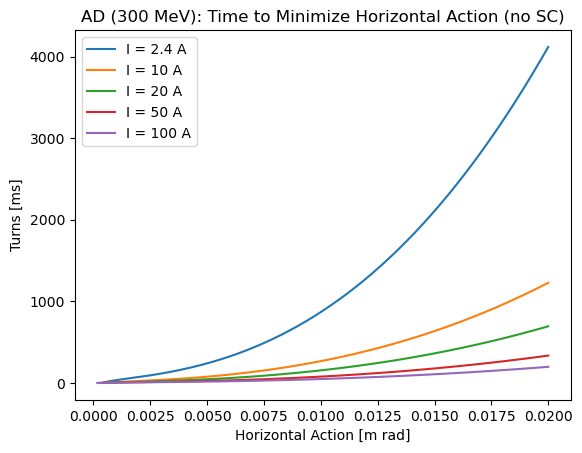

In [2]:
#Current without space charge

I_values = [2.4,10,20,50,100]


num_turns=int(3e6)
num_particles=1
step=num_turns/1000

for I in I_values:
    

    # initialize arrays
    x = []
    px = []
    y = []
    py = []
    action_x = []
    action_y = []
    force = []

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


    dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)


    goal_action=1e-8

    # loop over turns
    for i in tqdm(range(num_turns)):
        if i % step == 0:
            # append coordinates to arrays
            x.append(dtk_particle.x)
            px.append(dtk_particle.px)
            y.append(dtk_particle.y)
            py.append(dtk_particle.py)
            
            # calculate action in horizontal plane
            action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
            action_x.append(action_x_temp)
            
            # calculate action in vertical plane
            action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
            action_y.append(action_y_temp)
            
            if action_x_temp < goal_action:
                print(f"Reached goal action of {goal_action} in {i} turns.")
                break
                    
        # track particle through arc and cooler
        arc.track(dtk_particle)
        dtk_cooler.track(dtk_particle)

    # convert arrays to numpy arrays
    x = np.array(x)
    px = np.array(px)
    y = np.array(y)
    py = np.array(py)
    action_x = np.array(action_x)
    action_y = np.array(action_y)
    force = np.array(force)

    amplitude_x=np.sqrt(2*action_x[::-1]*beta_x)
    
    time = np.arange(0, num_turns, step) * ms_per_turn
    time = time[:len(amplitude_x)]
    # Plot the horizontal action versus time
    plt.plot(amplitude_x,time,label=f'I = {I} A')
    plt.ylabel('Turns [ms]')
    plt.xlabel('Horizontal Action [m rad]')
    plt.title('AD (300 MeV): Time to Minimize Horizontal Action (no SC)')
    plt.legend()
    plt.ticklabel_format(useOffset=False)

    
        


Reached goal action of 1e-08 in 4022911 turns.
Reached goal action of 1e-08 in 2436248 turns.
Reached goal action of 1e-08 in 1913295 turns.
Reached goal action of 1e-08 in 1400571 turns.
Reached goal action of 1e-08 in 1117488 turns.


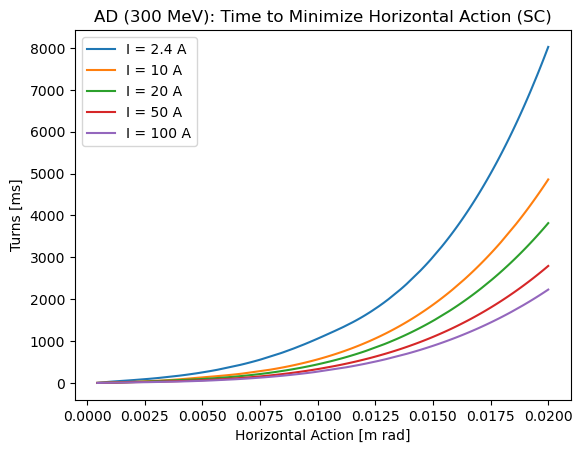

In [3]:
#Current with space charge

I_values = [2.4,10,20,50,100]


num_turns=int(1e7)
num_particles=1
step=1

for I in I_values:
    

    # initialize arrays
    x = []
    px = []
    y = []
    py = []
    action_x = []
    action_y = []
    force = []

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=1,Neutralisation_rotation=0)


    dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)


    goal_action=1e-8

    # loop over turns
    for i in (range(num_turns)):
        if i % step == 0:
            # append coordinates to arrays
            x.append(dtk_particle.x)
            px.append(dtk_particle.px)
            y.append(dtk_particle.y)
            py.append(dtk_particle.py)
            
            # calculate action in horizontal plane
            action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
            action_x.append(action_x_temp)
            
            # calculate action in vertical plane
            action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
            action_y.append(action_y_temp)
            
            if action_x_temp < goal_action:
                print(f"Reached goal action of {goal_action} in {i} turns.")
                break
                    
        # track particle through arc and cooler
        arc.track(dtk_particle)
        dtk_cooler.track(dtk_particle)

    # convert arrays to numpy arrays
    x = np.array(x)
    px = np.array(px)
    y = np.array(y)
    py = np.array(py)
    action_x = np.array(action_x)
    action_y = np.array(action_y)
    force = np.array(force)

    amplitude_x=np.sqrt(2*action_x[::-1]*beta_x)
    
    time = np.arange(0, num_turns, step) * ms_per_turn
    time = time[:len(amplitude_x)]
    # Plot the horizontal action versus time
    plt.plot(amplitude_x,time,label=f'I = {I} A')
    plt.ylabel('Turns [ms]')
    plt.xlabel('Horizontal Action [m rad]')
    plt.title('AD (300 MeV): Time to Minimize Horizontal Action (SC)')
    plt.legend()
    plt.ticklabel_format(useOffset=False)

    
        


Attempt 2:

In [4]:
I_values = np.linspace(2.4, 1e3, 200, endpoint=True)

num_turns=int(1e7)
num_particles=1
step=1

times_to_reach_goal = []

for I in tqdm(I_values):

    # initialize arrays
    x = []
    px = []
    y = []
    py = []
    action_x = []
    action_y = []
    force = []

    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                B=B,Z=Z,B_ratio=1e-10,
                                                Neutralisation_space_charge=1,Neutralisation_rotation=0)


    dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)


    goal_action=1e-8
    time_to_reach_goal = -1

    # loop over turns
    for i in (range(num_turns)):
        if i % step == 0:
            # append coordinates to arrays
            x.append(dtk_particle.x)
            px.append(dtk_particle.px)
            y.append(dtk_particle.y)
            py.append(dtk_particle.py)
            
            # calculate action in horizontal plane
            action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
            action_x.append(action_x_temp)
            
            # calculate action in vertical plane
            action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
            action_y.append(action_y_temp)
            
            if action_x_temp < goal_action and time_to_reach_goal < 0:
                time_to_reach_goal = i * ms_per_turn
                #print(f"Reached goal action of {goal_action} in {time_to_reach_goal} ms.")
                break 

        # track particle through arc and cooler
        arc.track(dtk_particle)
        dtk_cooler.track(dtk_particle)

    # append time to reach goal action for this I to list
    times_to_reach_goal.append(time_to_reach_goal)

    # convert arrays to numpy arrays
    x = np.array(x)
    px = np.array(px)
    y = np.array(y)
    py = np.array(py)
    action_x = np.array(action_x)
    action_y = np.array(action_y)
    force = np.array(force)

    amplitude_x=np.sqrt(2*action_x[::-1]*beta_x)
        
    



100%|██████████| 200/200 [3:10:17<00:00, 57.09s/it]  


Text(0.5, 1.0, 'AD (300 MeV): Time to Minimize Horizontal Action (SC)')

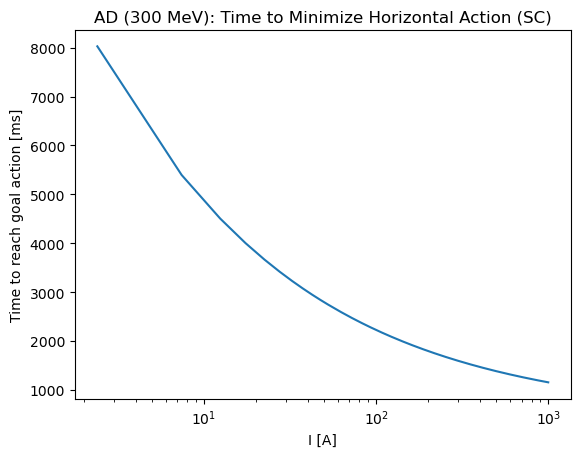

In [5]:
# plot time to reach goal action versus I
plt.figure()
plt.semilogx((I_values), (times_to_reach_goal))
plt.xlabel('I [A]')
plt.ylabel('Time to reach goal action [ms]')
plt.title('AD (300 MeV): Time to Minimize Horizontal Action (SC)')